In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [28]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the trained model
best_model = load_model('./best_model.h5')

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data = train_data.reshape((60000, 28, 28, 1))
train_data = train_data.astype('float32') / 255
test_data = test_data.reshape((10000, 28, 28, 1))
test_data = test_data.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [32]:
# get the predictions for the test data
predicted_classes = best_model.predict(test_data)

# argmax returns the index of the max value in a row
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

accuracy = (predicted_classes == np.argmax(test_labels, axis=1)).sum()/test_labels.shape[0]
print(f'Accuracy: {accuracy}')

313/313 [==============================] - 1s 5ms/step
Accuracy: 0.9933


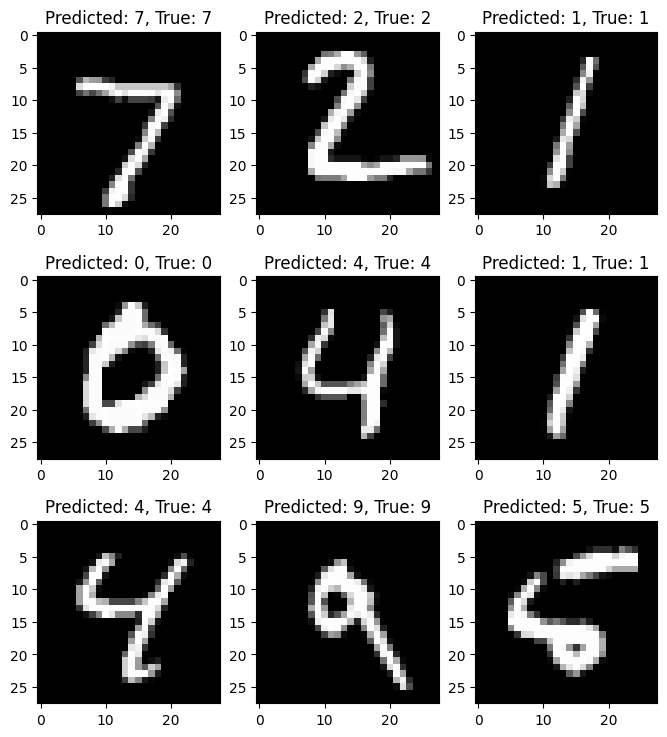

In [34]:
# plot the first 9 test images, their predicted labels, and the true labels
fig, axes = plt.subplots(3, 3, figsize=(8,9))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_data[i].reshape(28,28), cmap='gray')
    ax.set(title = f'Predicted: {predicted_classes[i]}, True: {np.argmax(test_labels[i])}')
plt.show()